In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

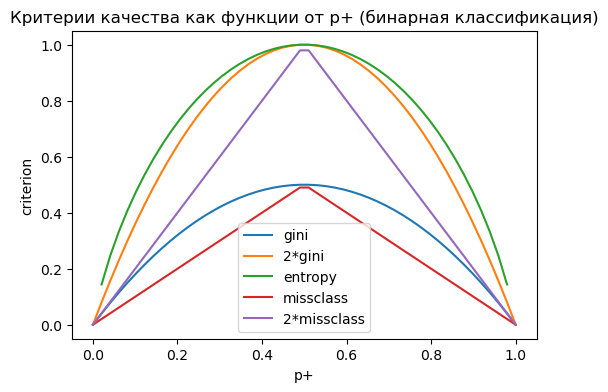

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x *(1 - x) for x in xx], label = 'gini')
plt.plot(xx, [4 * x *(1 - x) for x in xx], label = '2*gini')
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1-x) for x in xx], label = 'entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label = 'missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label = '2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от р+ (бинарная классификация)')
plt.legend()


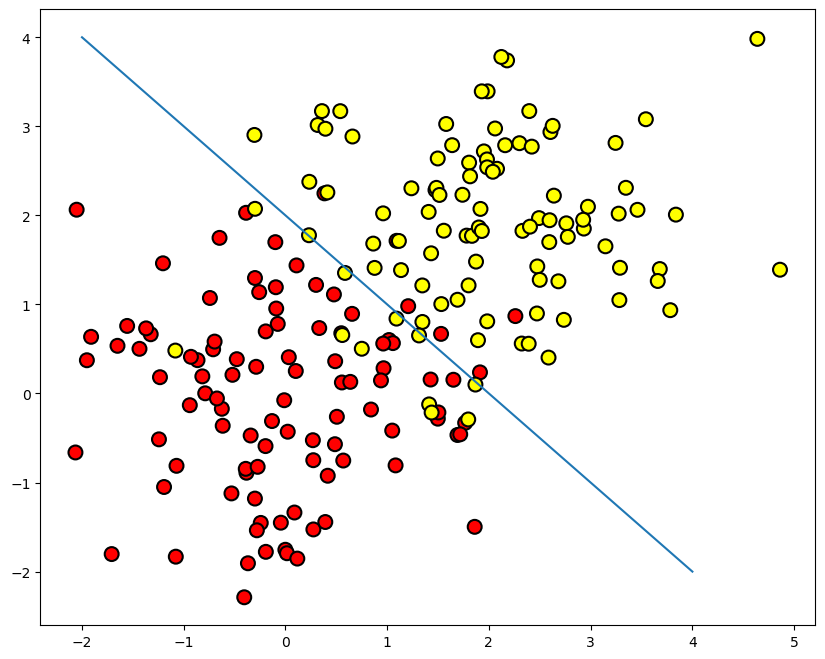

In [3]:
# Первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

# Добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)] 

#График
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:,0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1))


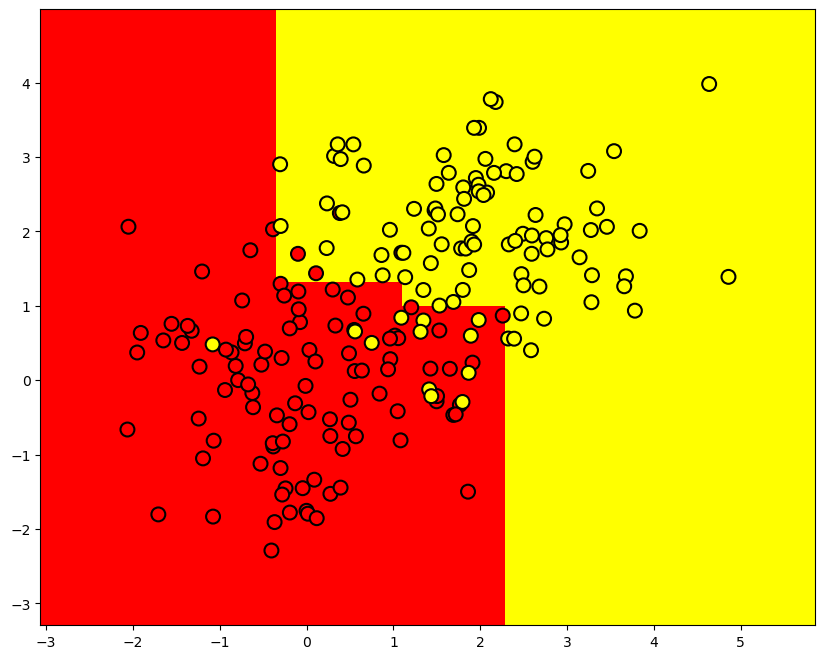

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Функция для возврата сетки 
def get_grid(data):
    x_min, x_max = data[:, 0].min() -1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() -1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

[Text(0.5769230769230769, 0.875, 'x[0] <= 1.103\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 1.325\nentropy = 0.657\nsamples = 106\nvalue = [88, 18]'),
 Text(0.15384615384615385, 0.375, 'x[1] <= 0.447\nentropy = 0.276\nsamples = 84\nvalue = [80, 4]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.605\nsamples = 27\nvalue = [23, 4]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= -0.346\nentropy = 0.946\nsamples = 22\nvalue = [8, 14]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]'),
 Text(0.8461538461538461, 0.625, 'x[1] <= 0.992\nentropy = 0.551\nsamples = 94\nvalue = [12, 82]'),
 Text(0.7692307692307693, 0.375, 'x[0] <= 2.291\nentropy = 0.996\nsamples = 26\nvalue = [12, 14]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.971\nsamples = 20\

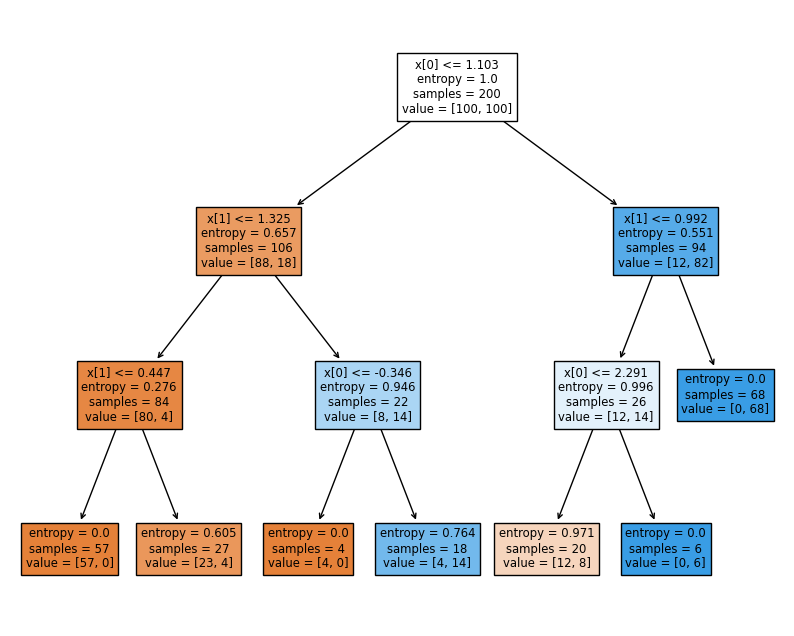

In [44]:
 tree.plot_tree(clf_tree, filled=True) 


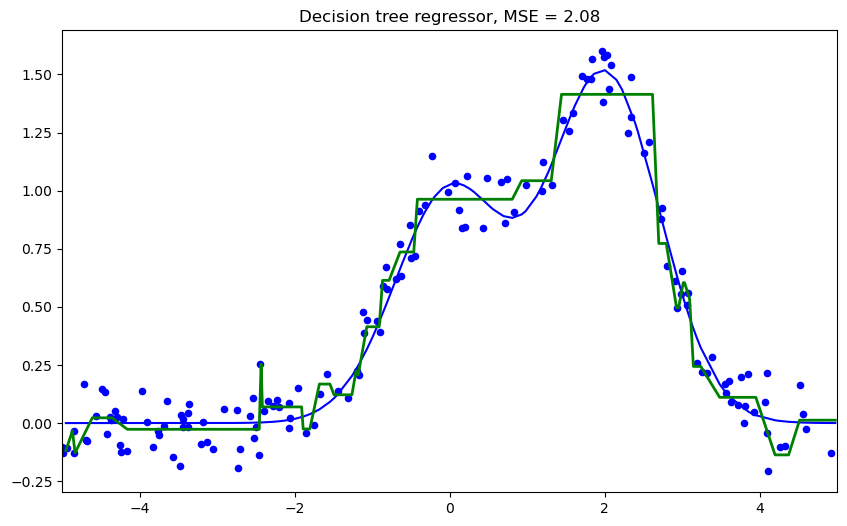

In [6]:
from sklearn.tree import DecisionTreeRegressor as DTR

n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples = n_train, noise=noise)
X_test, y_test = generate(n_samples = n_train, noise=noise)

reg_tree = DTR(max_depth=5, random_state = 17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [7]:
#Подготавливаем DF для применения Дерева и k-ближащих
df = pd.read_csv('data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State','Churn'], axis=1, inplace=True)
df.head(10)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,510,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,121,510,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,147,415,1,1,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,117,408,0,1,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,141,415,1,0,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)
tree1 = DecisionTreeClassifier(max_depth=5, random_state = 17)
knn = KNeighborsClassifier(n_neighbors=10)

tree1.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)


0.94

In [10]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree1, tree_params, cv=5, n_jobs=1, verbose=True)
tree_grid.fit(X_train, y_train)
print("Наилучшие параметры:", tree_grid.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Наилучшие параметры: {'max_depth': 6, 'max_features': 17}


In [12]:
print('Лучшая точность:', tree_grid.best_score_)
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

Лучшая точность: 0.94257014456259


0.946

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [14]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

0.9494233119813256


In [20]:
forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [31]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [32]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

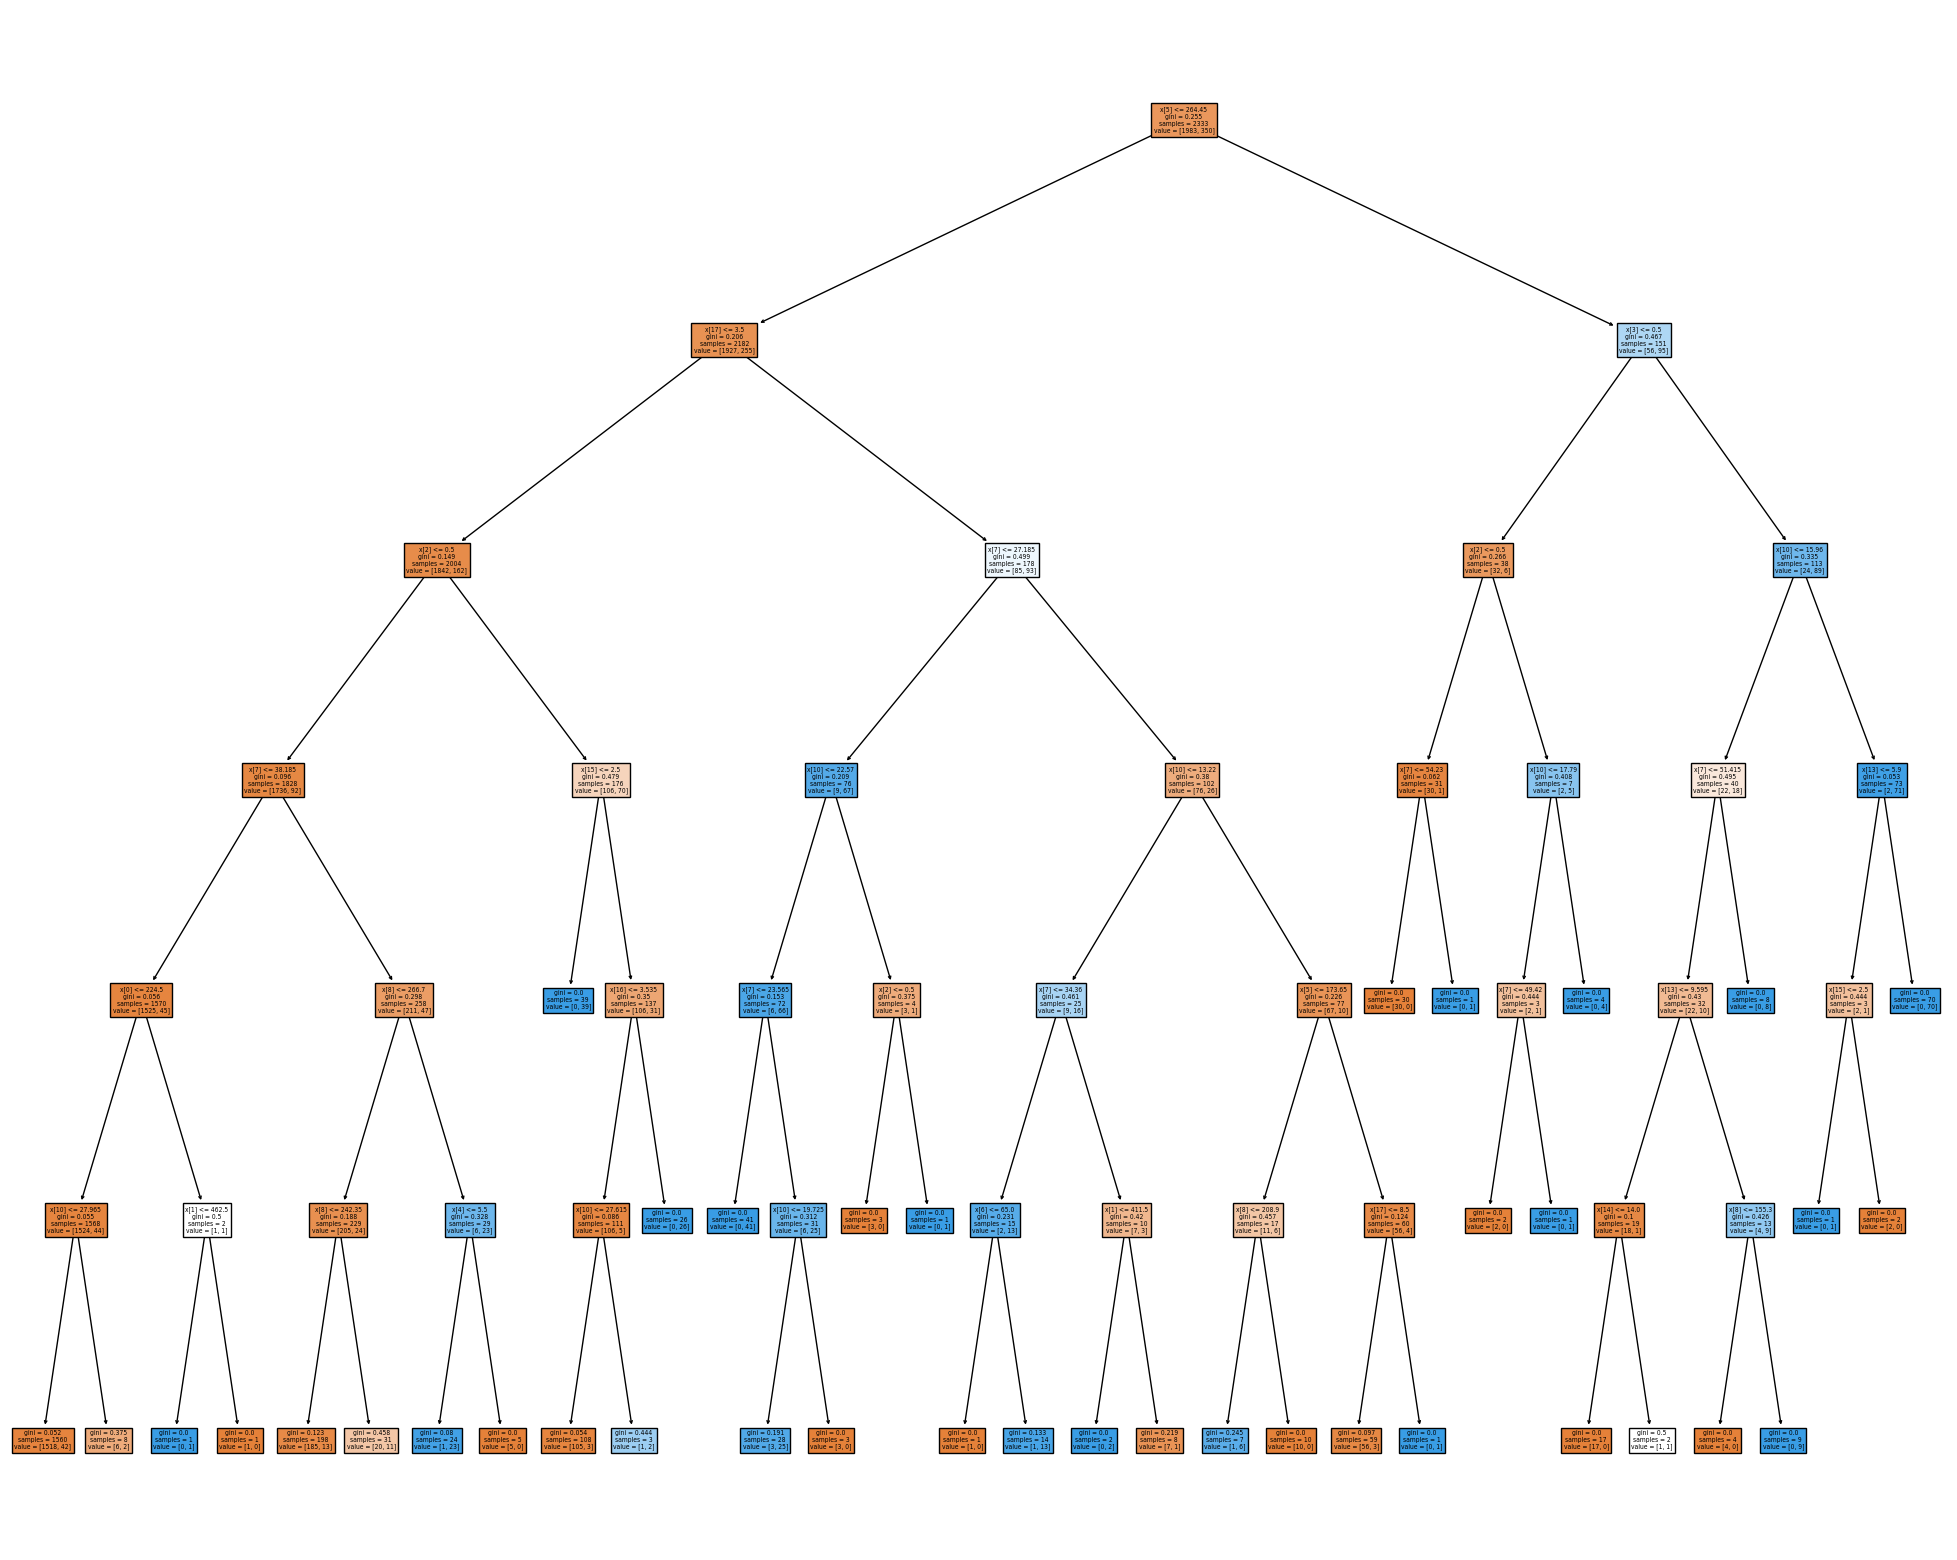

In [61]:
from sklearn.tree import export_graphviz
fig = plt.figure(figsize=(25,20))
x = tree.plot_tree(tree_grid.best_estimator_,filled=True)
fig.savefig("decistion_tree.svg")

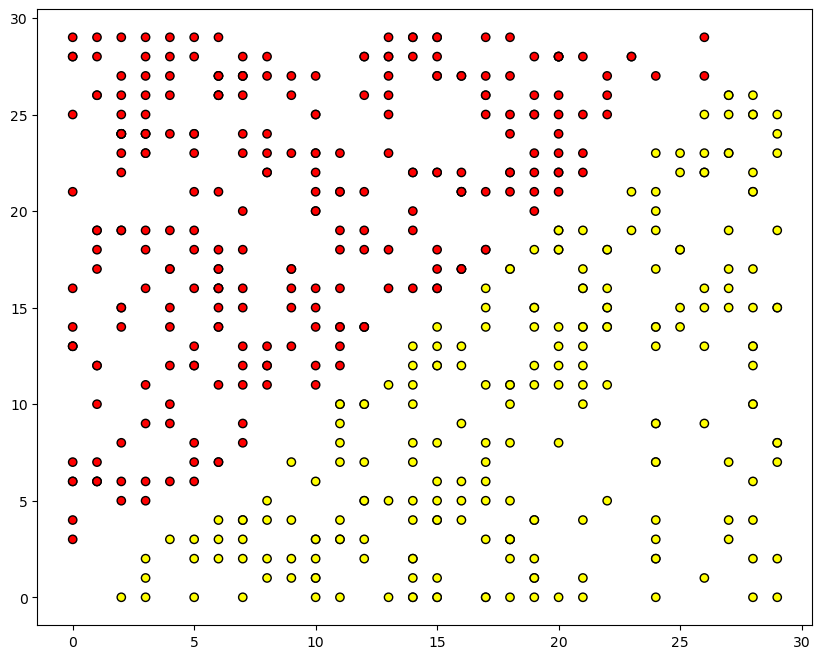

In [70]:
def form_linary_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linary_separable_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

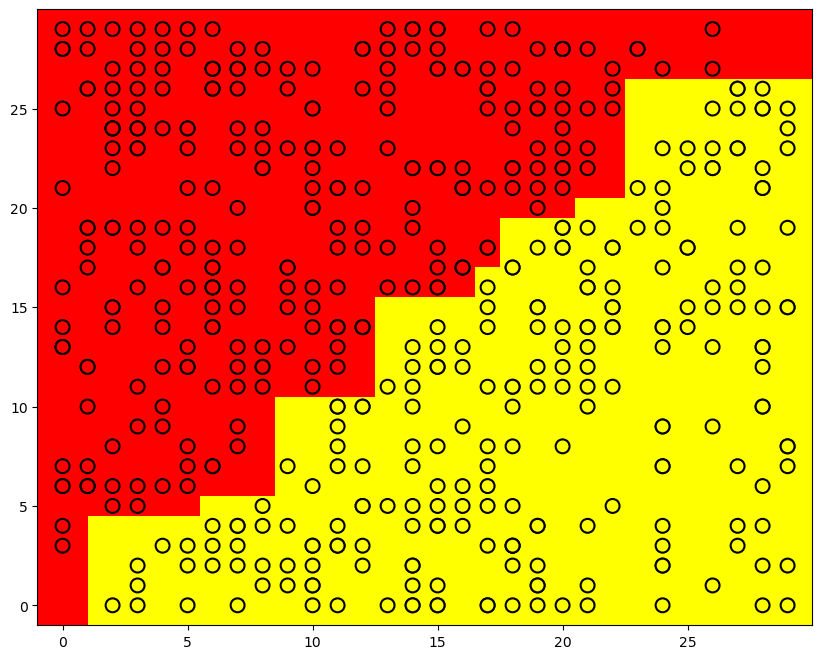

In [79]:
easy_tree = DecisionTreeClassifier(random_state=17).fit(X,y)

xx,yy = get_grid(X)
predicted = easy_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:,0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)

In [80]:
easy_knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1).fit(X, y)

xx, yy = get_grid(X)
predicted = easy_knn.predict(np.c_[xx.ravel(),  yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:,0], X[:,1], c=y,s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

KeyboardInterrupt: 

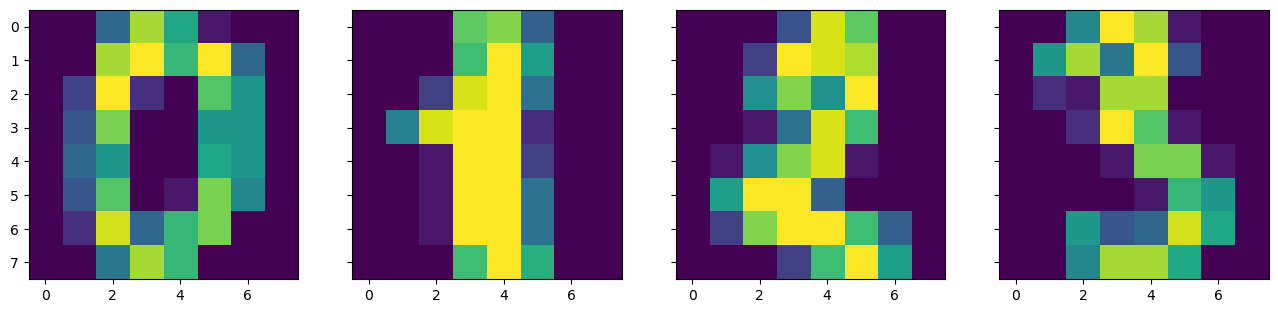

In [89]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]))

In [90]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [91]:
tree_pred = tree.predict(X_holdout)
knn_pred  = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [92]:
tree_params = {'max_depth': [1,2,3,5,10,20,25,30,40,50,64],
               'max_features': [1,2,3,5,10,20,25,30,40,50,64]}

tree_grid = GridSearchCV(tree, tree_params, cv=5,n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50,
                                          64]},
             verbose=True)

In [93]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [95]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9864858028204642

In [96]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5))

0.9753462341111744